<a href="https://colab.research.google.com/github/ufbfung/data-science/blob/main/data_science_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science 101
To maximize retention of concepts learned from the Machine Learning Specialization courses from Andrew Ng on Coursera, I'll be using this notebook to take notes on the foundations of building machine learning models. Ideally, this will include both the end-to-end implementation of functions alongside the usage of python libraries to demonstrate how the latter can be quickly/efficiently used to implement ML models.

# Datasets
In this section, we'll either use extremely simple datasets that I manually create, or later, add some larger datasets from libraries like datasets from HuggingFace.

In [24]:
# Install relevant libraries
import math, copy
import pandas as pd # for working with dataframes
import numpy as np # for working with arrays
import matplotlib.pyplot as plt # for plotting

In [12]:
# Create a simple dataset from class examples
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

# Create simple dataset for average net worth of individuals in the US
x_train2 = np.array([20, 30, 40, 50, 60, 70, 80, 90]) # age by decade
y_train2 = np.array([6847, 37831, 137656, 307691, 478274, 402266, 369981, 341234]) # median net worth by age

# Functions

## Basic linear regression

In [39]:
# Implement basic linear regression functions

# Calculate cost
def compute_cost(x, y, w, b):
    m = x.shape[0] # number of training examples. This is a 1d array so it's just the number of rows.
    cost = 0

    # iterate through training examples and calculate the cost
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2

    # calculate the total cost
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Calculate Gradient
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    # iterate over training examples
    for i in range(m):
        f_wb = w * x[i] + b

        # calculate the partial derivatives for each training example
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        # sum the partial derivatives
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i

        # calculate the total
        dj_dw = dj_dw / m
        dj_db = dj_db / m

    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    # set initial values for b and w
    b = b_in
    w = w_in

    # calculate parameters for number of iterations specified
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            w_history.append(w)
        # print cost at every intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, w_history # return history for graphing

def plot_cost_vs_iteration(J_hist):
    """
    Plot cost versus iteration for the first 100 iterations and from the 1000th iteration onward.

    Args:
      J_hist (list): History of cost values
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
    ax1.plot(J_hist[:100])
    ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
    ax1.set_title("Cost vs. Iteration (Start)")
    ax2.set_title("Cost vs. Iteration (End)")
    ax1.set_ylabel('Cost')
    ax2.set_ylabel('Cost')
    ax1.set_xlabel('Iteration Step')
    ax2.set_xlabel('Iteration Step')

    plt.show()

def plot_contour(x, y, w_history, b_history, cost_function):
    """
    Plot a contour plot of the cost function.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w_history (list): List of w values during gradient descent
      b_history (list): List of b values during gradient descent
      cost_function:   function to call to produce cost
    """

    # Generate theta values
    theta0_values = np.linspace(min(w_history), max(w_history), 100)
    theta1_values = np.linspace(min(b_history), max(b_history), 100)

    # Create a meshgrid for contour plot
    theta0, theta1 = np.meshgrid(theta0_values, theta1_values)
    J_values = np.zeros_like(theta0)

    # Calculate cost for each pair of parameters
    for i in range(len(theta0_values)):
        for j in range(len(theta1_values)):
            J_values[i, j] = cost_function(x, y, theta0_values[i], theta1_values[j])

    # Create a contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contour(theta0, theta1, J_values, levels=20, cmap='viridis')

    # Add labels and title
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title('Contour Plot of Cost Function during Gradient Descent')

    # Add colorbar
    plt.colorbar(contour, label='Cost')

    # Plot the trajectory of parameters during gradient descent
    plt.plot(w_history, b_history, marker='o', color='red', label='Gradient Descent')

    # Show the plot
    plt.legend()
    plt.show()

In [29]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, w_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.00e+04  dj_dw: -5.750e+02, dj_db: -3.250e+02   w:  5.750e+00, b: 3.25000e+00
Iteration 1000: Cost 2.22e+00  dj_dw: -1.572e-01, dj_db:  2.776e-01   w:  1.963e+02, b: 1.06566e+02
Iteration 2000: Cost 9.52e-01  dj_dw: -1.030e-01, dj_db:  1.819e-01   w:  1.976e+02, b: 1.04302e+02
Iteration 3000: Cost 4.09e-01  dj_dw: -6.749e-02, dj_db:  1.192e-01   w:  1.984e+02, b: 1.02819e+02
Iteration 4000: Cost 1.76e-01  dj_dw: -4.422e-02, dj_db:  7.811e-02   w:  1.990e+02, b: 1.01847e+02
Iteration 5000: Cost 7.54e-02  dj_dw: -2.898e-02, dj_db:  5.118e-02   w:  1.993e+02, b: 1.01211e+02
Iteration 6000: Cost 3.24e-02  dj_dw: -1.899e-02, dj_db:  3.354e-02   w:  1.996e+02, b: 1.00793e+02
Iteration 7000: Cost 1.39e-02  dj_dw: -1.244e-02, dj_db:  2.198e-02   w:  1.997e+02, b: 1.00520e+02
Iteration 8000: Cost 5.97e-03  dj_dw: -8.153e-03, dj_db:  1.440e-02   w:  1.998e+02, b: 1.00341e+02
Iteration 9000: Cost 2.56e-03  dj_dw: -5.343e-03, dj_db:  9.436e-03   w:  1.999e+02, b: 1.00223e+02


## Sanity checking gradient descent
To ensure the parameters are appropriate, we should always check that the cost is decreasing with every iteration - which can be easily visualized using the code below.

If the cost is NOT decreasing, it could be an issue of:
- the learning rate is too large
- the code is incorrect

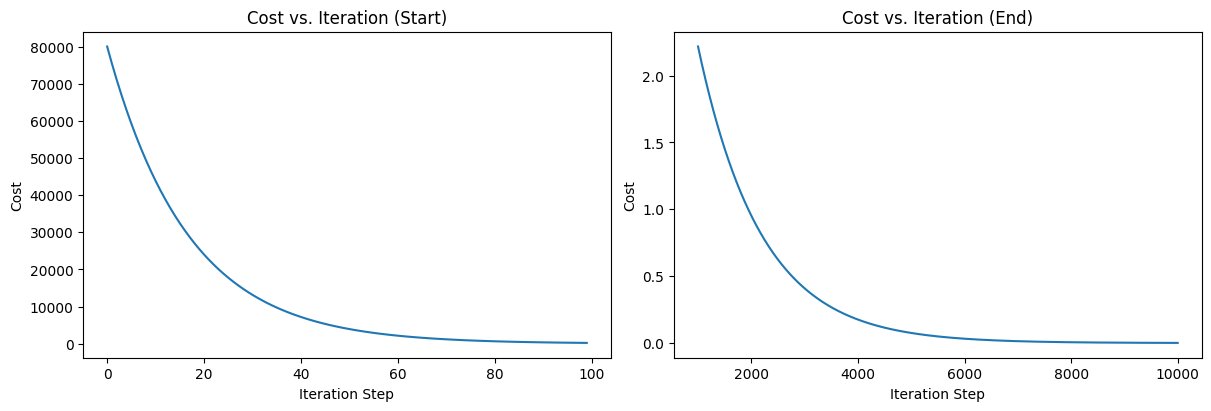

In [40]:
# plot cost versus iteration
plot_cost_vs_iteration(J_hist)

## Feature Scaling
If your features vary in magnitude, it's ideal to perform feature scaling to normalize the values across them. There are multiple ways to do this which include:
- feature scaling
- mean normalization
- z-scoring

**Feature scaling**
In this method, you essentially divide each positive feature by its maximum value, or more generally, rescale each feature by both its min and max values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.

**Mean Normalization**

**Z-scoring**

In general, you should aim to have your features range in values of:
-1 <= x <= 1

However, the following are also acceptable:
- -3 <= x <= 3
- -0.3 <= x <= 3

Some other scenarios that are acceptable, but not ideal include:
- 0 <= x <= 3
-2 <= x <= 0.5

Scenarios where it may be ideal to do feature scaling include:
- -100 <= x <= 100: (these are too large)
- -0.001 <= x <= 0.001 (these are too small)


In [44]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

# Predictions

In [27]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.1 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


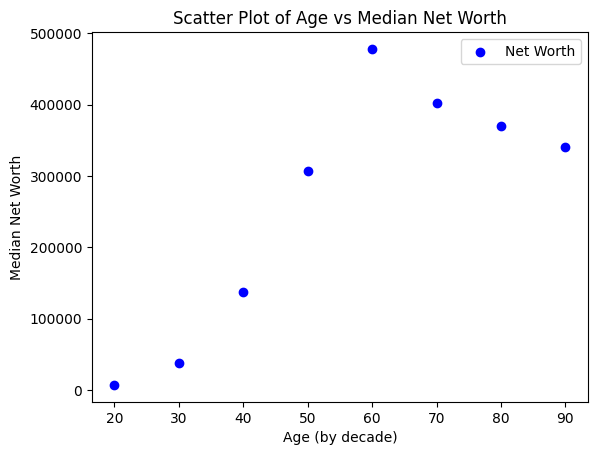

In [30]:
# Create a scatter plot
plt.scatter(x_train2, y_train2, color='blue', marker='o', label='Net Worth')

# Add labels and title
plt.xlabel('Age (by decade)')
plt.ylabel('Median Net Worth')
plt.title('Scatter Plot of Age vs Median Net Worth')
plt.legend()

# Show the plot
plt.show()

Iteration    0: Cost 8.00e+04  dj_dw: -5.750e+02, dj_db: -3.250e+02   w:  5.750e+00, b: 3.25000e+00
Iteration 1000: Cost 2.22e+00  dj_dw: -1.572e-01, dj_db:  2.776e-01   w:  1.963e+02, b: 1.06566e+02
Iteration 2000: Cost 9.52e-01  dj_dw: -1.030e-01, dj_db:  1.819e-01   w:  1.976e+02, b: 1.04302e+02
Iteration 3000: Cost 4.09e-01  dj_dw: -6.749e-02, dj_db:  1.192e-01   w:  1.984e+02, b: 1.02819e+02
Iteration 4000: Cost 1.76e-01  dj_dw: -4.422e-02, dj_db:  7.811e-02   w:  1.990e+02, b: 1.01847e+02
Iteration 5000: Cost 7.54e-02  dj_dw: -2.898e-02, dj_db:  5.118e-02   w:  1.993e+02, b: 1.01211e+02
Iteration 6000: Cost 3.24e-02  dj_dw: -1.899e-02, dj_db:  3.354e-02   w:  1.996e+02, b: 1.00793e+02
Iteration 7000: Cost 1.39e-02  dj_dw: -1.244e-02, dj_db:  2.198e-02   w:  1.997e+02, b: 1.00520e+02
Iteration 8000: Cost 5.97e-03  dj_dw: -8.153e-03, dj_db:  1.440e-02   w:  1.998e+02, b: 1.00341e+02
Iteration 9000: Cost 2.56e-03  dj_dw: -5.343e-03, dj_db:  9.436e-03   w:  1.999e+02, b: 1.00223e+02


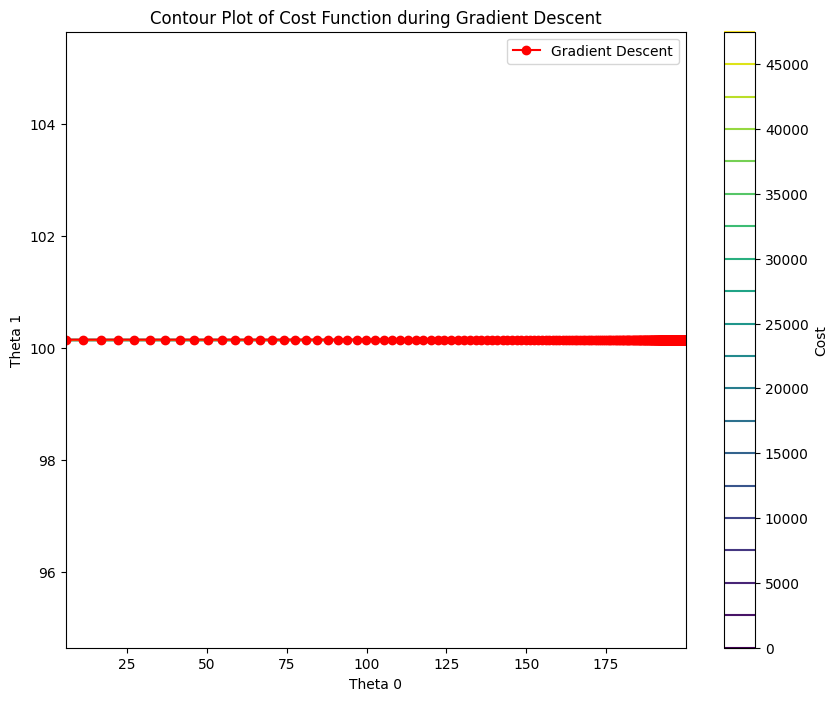

In [43]:
w_initial, b_initial = 0, 0
alpha = 0.01
num_iters = 10000
w_final, b_final, J_history, w_history = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, num_iters, compute_cost, compute_gradient)

# Plot the contour
plot_contour(x_train, y_train, w_history, [b_final]*len(w_history), compute_cost)

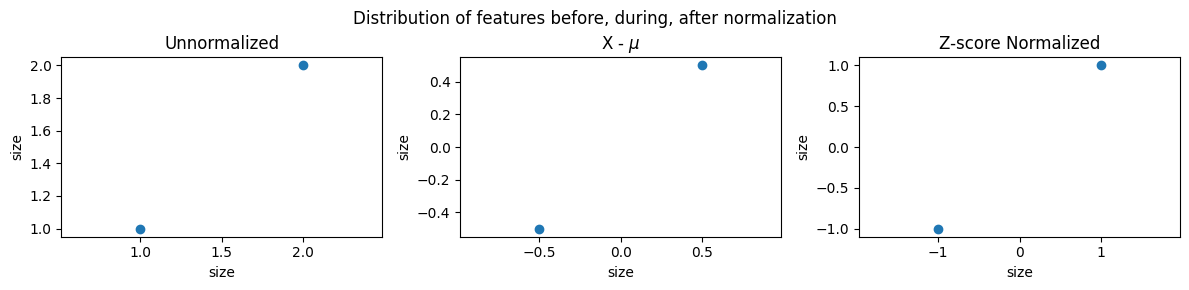

In [47]:
from re import X
def visualize_zscore_normalization(X_train, X_features):
    """
    Visualize the distribution of features before, during, and after z-score normalization.

    Args:
      X_train (ndarray (m,)): Training data, m examples
      X_features (list): List of feature names

    Returns:
      None
    """

    def zscore_normalize_features(X):
        mu = np.mean(X)
        sigma = np.std(X)
        X_norm = (X - mu) / sigma
        return X_norm, mu, sigma

    # Perform z-score normalization
    X_norm, mu, sigma = zscore_normalize_features(X_train)

    # Create subplots
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))

    # Plot unnormalized data
    ax[0].scatter(X_train[:], X_train[:])
    ax[0].set_xlabel(X_features[0])
    ax[0].set_ylabel(X_features[0])
    ax[0].set_title("Unnormalized")
    ax[0].axis('equal')

    # Plot (X - mu)
    ax[1].scatter((X_train - mu)[:], (X_train - mu)[:])
    ax[1].set_xlabel(X_features[0])
    ax[1].set_ylabel(X_features[0])
    ax[1].set_title(r"X - $\mu$")
    ax[1].axis('equal')

    # Plot z-score normalized data
    ax[2].scatter(X_norm[:], X_norm[:])
    ax[2].set_xlabel(X_features[0])
    ax[2].set_ylabel(X_features[0])
    ax[2].set_title(r"Z-score Normalized")
    ax[2].axis('equal')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle("Distribution of features before, during, after normalization")
    plt.show()

# Define data
X_train = x_train
X_features = ['size']

# Call the function like this:
visualize_zscore_normalization(X_train, X_features)